<a href="https://colab.research.google.com/github/DianaI20/Pet_finder/blob/main/Pet_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PENTRU LORENA:

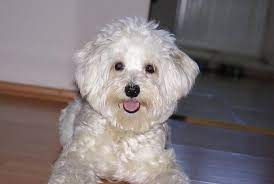


CE AM FACUT NOU:
* AM STERS TOT CE INSEAMNA OBIECT TEXT CA SCRIE IN CARTE CA E MAI USOR ASA (NU MAI AVEM NUMELE DE LA COLOANE AVEM DOAR ID-UL) 
* AM  PLOTAT HISTOGRAMELE SI  ALEA REPREZINTA NUMARUL RAPORTAT LA NUMARUL TOTAL SAU CEVA DE ENTRY-URI GEN
* TREBUIE SA MAI VERIFICI DACA AM DAT DROP LA TOT CA NU-S SIGURA

# Description and problem

  Problem description: You are a pet lover and you want to find the perfect pair of paws to walk around your house. There are so many animals in our Animal Rescue Service, but some of them have a little hard time in finding their way home. 

Task:  We would like to help our pets to find a loving home, therefore we want to create a model that will be able predict a pet's speed adoption. In this way we will be able to give each pet a nice loving home. 

# Importing data

In [ ]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
from sklearn.preprocessing import OrdinalEncode

import io

In [ ]:
# read from local file 
uploaded = files.upload()

# Read CSV data using pandas 
# The data is read in a DataFrame 
trainFrame = pd.read_csv(io.BytesIO(uploaded['train.csv']))
breedLabelsFrame = pd.read_csv(io.BytesIO(uploaded['breed_labels.csv']))
colorLabelsFrame = pd.read_csv(io.BytesIO(uploaded['color_labels.csv']))
stateLabelsFrame = pd.read_csv(io.BytesIO(uploaded['state_labels.csv']))
 

Saving breed_labels.csv to breed_labels (1).csv
Saving color_labels.csv to color_labels (1).csv
Saving state_labels.csv to state_labels (1).csv
Saving train.csv to train (1).csv


  Our data is composed of multiple tables structured similar to a database. We have the main table for training our model which has references to other tables via a foreign key ( the id of a feature is specified in a column: ColorID, BreedID, StateID). 
To visualize our data better, we performed a merge between tables, so that we can establish the null data referenced by our table.

# Merging data

In [ ]:
# merging the frames 
mainFrame = pd.merge(trainFrame, breedLabelsFrame,  how='left', left_on = 'Breed1', right_on = 'BreedID') 
mainFrame = pd.merge(mainFrame, breedLabelsFrame,  how='left', left_on = 'Breed2', right_on = 'BreedID') 
mainFrame = pd.merge(mainFrame, colorLabelsFrame,  how='left', left_on = 'Color1', right_on = 'ColorID') 
mainFrame = pd.merge(mainFrame, colorLabelsFrame,  how='left', left_on = 'Color2', right_on = 'ColorID') 
mainFrame = pd.merge(mainFrame, colorLabelsFrame,  how='left', left_on = 'Color3', right_on = 'ColorID') 
mainFrame = pd.merge(mainFrame, stateLabelsFrame,  how='left', left_on = 'State', right_on = 'StateID') 

In [ ]:
pd.set_option('display.max_columns', None)
mainFrame.head(20)

,Type_x,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,BreedID_x,Type_y,BreedName_x,BreedID_y,Type,BreedName_y,ColorID_x,ColorName_x,ColorID_y,ColorName_y,ColorID,ColorName,StateID,StateName
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,299.0,2.0,Tabby,NaN,NaN,NaN,1,Black,7.0,White,NaN,NaN,41326,Selangor
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,265.0,2.0,Domestic Medium Hair,NaN,NaN,NaN,1,Black,2.0,Brown,NaN,NaN,41401,Kuala Lumpur
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,307.0,1.0,Mixed Breed,NaN,NaN,NaN,2,Brown,7.0,White,NaN,NaN,41326,Selangor
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN,1,Black,2.0,Brown,NaN,NaN,41401,Kuala Lumpur
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN,1,Black,NaN,NaN,NaN,NaN,41326,Selangor
5,2,NaN,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,266.0,2.0,Domestic Short Hair,NaN,NaN,NaN,5,Cream,6.0,Gray,NaN,NaN,41326,Selangor
6,2,BULAT,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,264.0,2.0,Domestic Long Hair,264.0,2.0,Domestic Long Hair,1,Black,NaN,NaN,NaN,NaN,41326,Selangor
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,307.0,1.0,Mixed Breed,NaN,NaN,NaN,1,Black,2.0,Brown,7.0,White,41326,Selangor
8,2,NaN,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,265.0,2.0,Domestic Medium Hair,NaN,NaN,NaN,6,Gray,NaN,NaN,NaN,NaN,41326,Selangor
9,2,Kitty,12,265,0,2,1,7,0,2,2,3,3,3,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4,265.0,2.0,Domestic Medium Hair,NaN,NaN,NaN,1,Black,7.0,White,NaN,NaN,41326,Selangor


# Cleaning data
We have to keep only the relevant data after merging, therefore we deleted the columns that were duplicated or didn't fulfill a specific purpose for achieving our goal.

After analyzing what we have, we decided to remove some of the columns that we considered not to be relevant for our predictions. The columns removed were:  

*   Name
*   RescuerID

We visualized the problem in this manner: if a pet lover wants to adopt, he wouldn't ask who rescued the pet or what its name is,  he would rather look at the breed, description, type etc. because these are the features that may match their preferences.

In [ ]:
# deleting duplicates & irrelevant columns and renaming merged columns 
mainFrame.drop(['Type_y', 'Type', 'ColorID','ColorID_x','ColorID_y', 'BreedID_x','BreedID_y','StateID','RescuerID', 'Name', 'Description'], axis=1, inplace=True)
mainFrame.rename(columns = {'BreedName_x':'BreedName1', 'BreedName_y':'BreedName2','Type_x':'Type','ColorName_x':'ColorName1', 'ColorName_y':'ColorName2', 'ColorName': 'ColorName3'}, inplace = True)

After making sure we have only relevant information, we tried to find if there are any missing-data isssues. 

In [ ]:
# returns number of null values for each column 
mainFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14988 entries, 0 to 14992
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PetID          14988 non-null  object 
 1   Type           14988 non-null  int64  
 2   Age            14988 non-null  int64  
 3   State          14988 non-null  int64  
 4   StateName      14988 non-null  object 
 5   Breed1         14988 non-null  int64  
 6   BreedName1     14988 non-null  object 
 7   Color1         14988 non-null  int64  
 8   ColorName1     14988 non-null  object 
 9   Color2         14988 non-null  int64  
 10  ColorName2     10518 non-null  object 
 11  Gender         14988 non-null  int64  
 12  MaturitySize   14988 non-null  int64  
 13  FurLength      14988 non-null  int64  
 14  Vaccinated     14988 non-null  int64  
 15  Dewormed       14988 non-null  int64  
 16  Sterilized     14988 non-null  int64  
 17  Health         14988 non-null  int64  
 18  Quanti

As  it can be seen, we have some missing data that couldn't be seen in the first place. This is due to the fact that some references to the other tables are invalid and there is no id matching the entry specified. 
We have missing data in the following columns: 


*   ColorName3 
*   BreedName2 
*   ColorName2 
*   BreedNam1 
*   Description 

To solve our missing data issues we found the following solutions: 


*   We removed the rows where BreedName1 is null since there is a very small percentage of the data (0.03%)
*   We created a new column isMixed that tells us if a pet is mixed breed or not and then we removed columns Breed2 and BreedName2 since they are not relevant anymore. 
*   We removed column Color3 since it has 70.72 % of the data null.
*  We also removed the data most of the data that is not numerical since it is already encoded.









In [ ]:
#delete the null rows 
mainFrame = mainFrame[~mainFrame.BreedName1.isnull()]

# create a new column to find if the pet is mixed breed
mainFrame['isMixed'] = np.where(mainFrame.BreedName2.isnull(), False, True)

#drop the columns with too many null values or object values 
mainFrame.drop(['Breed2','BreedName2', 'Color3', 'ColorName3', 'Description','BreedName1','ColorName1', 'ColorName2', ], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace

For a better visualisation we rearranged the columns in a different order.

In [ ]:
# rearraging columns 
mainFrame = mainFrame[['PetID', 'Type', 'Age', 'State','StateName', 'Breed1','BreedName1', 'Color1', 'ColorName1', 'Color2', 'ColorName2','Gender','MaturitySize', 'FurLength','Vaccinated','Dewormed','Sterilized','Health','Quantity','Fee','PhotoAmt','AdoptionSpeed' ]]


NameError: ignored

In [ ]:
mainFrame.head(50)

,PetID,Type,Age,State,StateName,Breed1,BreedName1,Color1,ColorName1,Color2,ColorName2,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,Description,PhotoAmt,AdoptionSpeed
0,86e1089a3,2,3,41326,Selangor,299,Tabby,1,Black,7,White,1,1,1,2,2,2,1,1,100,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2
1,6296e909a,2,1,41401,Kuala Lumpur,265,Domestic Medium Hair,1,Black,2,Brown,1,2,2,3,3,3,1,1,0,I just found it alone yesterday near my apartm...,2.0,0
2,3422e4906,1,1,41326,Selangor,307,Mixed Breed,2,Brown,7,White,1,2,2,1,1,2,1,1,0,Their pregnant mother was dumped by her irresp...,7.0,3
3,5842f1ff5,1,4,41401,Kuala Lumpur,307,Mixed Breed,1,Black,2,Brown,2,2,1,1,1,2,1,1,150,"Good guard dog, very alert, active, obedience ...",8.0,2
4,850a43f90,1,1,41326,Selangor,307,Mixed Breed,1,Black,0,NaN,1,2,1,2,2,2,1,1,0,This handsome yet cute boy is up for adoption....,3.0,2
5,d24c30b4b,2,3,41326,Selangor,266,Domestic Short Hair,5,Cream,6,Gray,2,2,1,2,2,2,1,1,0,This is a stray kitten that came to my house. ...,2.0,2
6,1caa6fcdb,2,12,41326,Selangor,264,Domestic Long Hair,1,Black,0,NaN,1,2,3,2,2,3,1,1,300,anyone within the area of ipoh or taiping who ...,3.0,1
7,97aa9eeac,1,0,41326,Selangor,307,Mixed Breed,1,Black,2,Brown,2,2,1,2,2,2,1,6,0,Siu Pak just give birth on 13/6/10 to 6puppies...,9.0,3
8,c06d167ca,2,2,41326,Selangor,265,Domestic Medium Hair,6,Gray,0,NaN,2,2,2,2,2,2,1,1,0,"healthy and active, feisty kitten found in nei...",6.0,1
9,7a0942d61,2,12,41326,Selangor,265,Domestic Medium Hair,1,Black,7,White,2,2,2,3,3,3,1,1,0,"Very manja and gentle stray cat found, we woul...",2.0,4


# Vizualising and analyzing 
We are trying to visualize the data. And see how it is distributed over the whole data model, therefore we are generating histograms for every integer value.

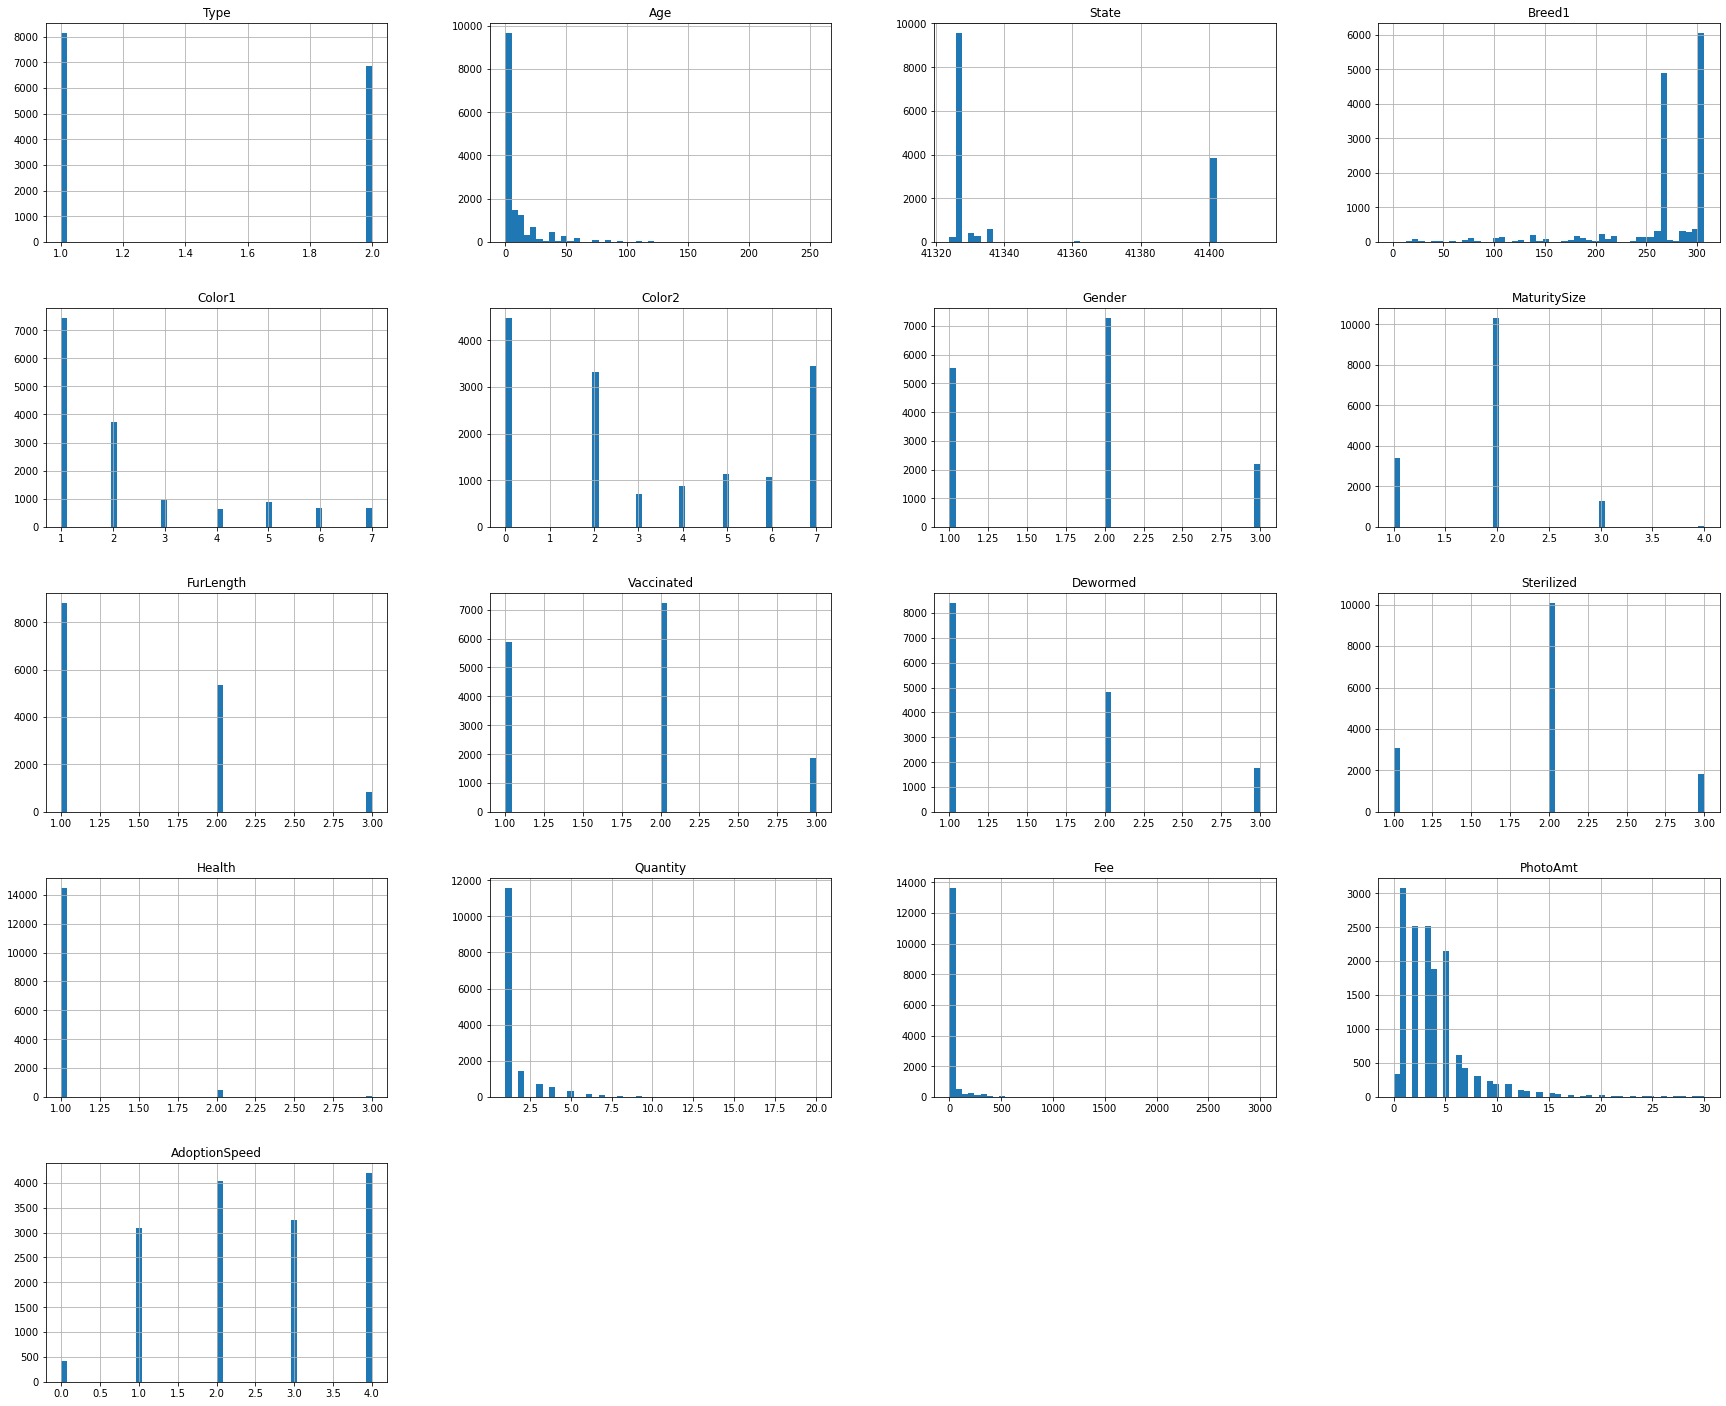

In [ ]:
mainFrame.hist(bins=50, figsize=(30,25))
plt.show()

We have to take into consideration the following notations:
* For health: 1 = Yes, 2 = No, 3 = Not Sure
* For gender: 1 = Male, 2 = Female, 3 = Mixed (multiple pets in the photos)

We can make the following observations based on the histograms: 

*   There is no error regarding the types: we have only two types of pets: cats and dogs, denoted with  1 and 2.
*   There are a significant number of pets with 0 months, therefore we expect our model to have better predictions for that category of pets. 
*   We can see that our data is significantly different for different states, therefore we expect to be more efficient for a specific states, since it has more information.
*   Regarding the quantity - there are considerable more entries with only one pet therefore our model will be better trained for that type of data. 
*  From the Fee histogram we can see that more than 85% of the pets have no fee, therefore our model will not be very accurate if we enter a fee since less than 10% of the data contains a fee. 



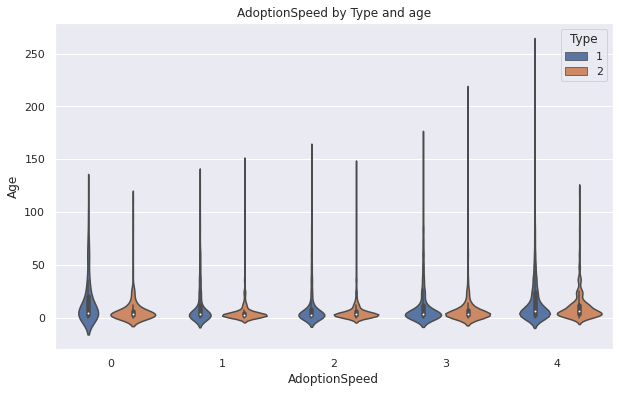

In [175]:
plt.figure(figsize=(10, 6));

plot = sns.violinplot(x="AdoptionSpeed", y="Age", hue="Type", data=mainFrame);
plt.title('AdoptionSpeed by Type and Age');


Text(0.5, 1.0, 'Pets by gender')

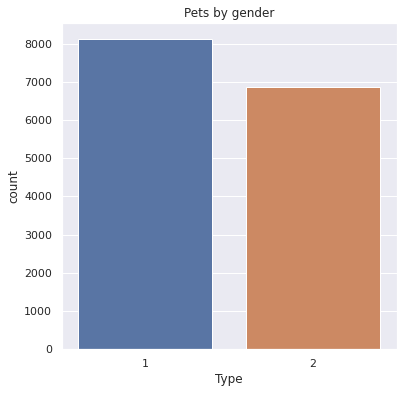

In [190]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.set_theme(style="darkgrid")
chart = sns.countplot( x ='Type', data=mainFrame)
chart.set_title("Pets by gender")


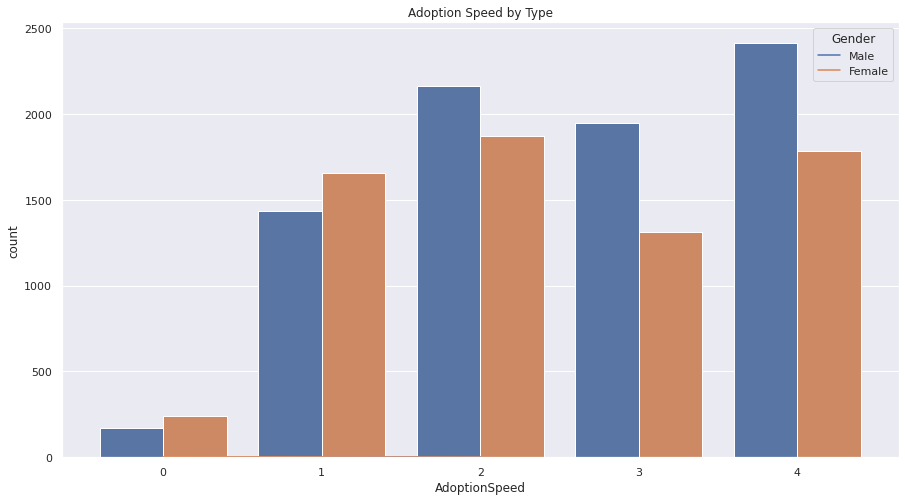

In [167]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="darkgrid")
chart = sns.countplot( x ='AdoptionSpeed', hue="Type", data=mainFrame)
chart.set_title("Adoption Speed by Type")
legend_labels = chart.get_legend_handles_labels()
line_up, = plt.plot([1,2,3], label='Male')
line_down, = plt.plot([3,2,1], label='Female')
chart.legend(handles=[line_up, line_down], title = 'Gender')

Text(0.5, 1.0, 'Adoption Speed by Maturity')

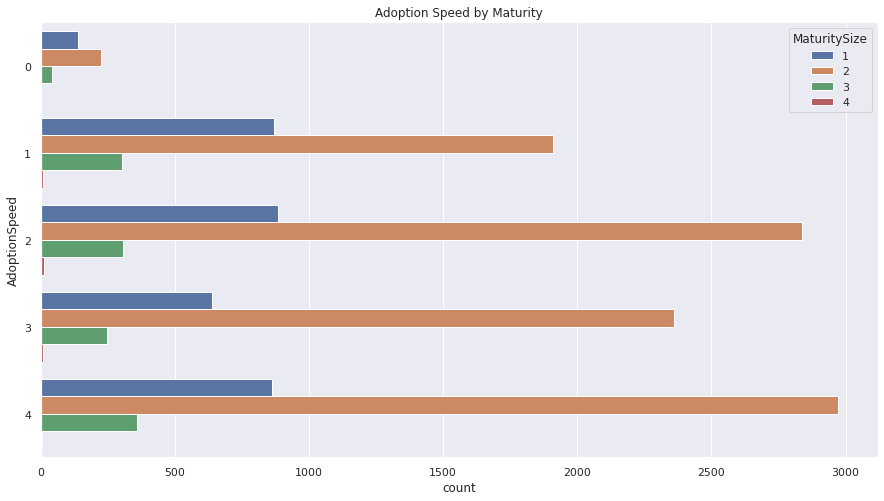

In [204]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="darkgrid")
chart = sns.countplot( y ='AdoptionSpeed', hue="MaturitySize", data=mainFrame)
chart.set_title("Adoption Speed by Maturity")


From the chart above we can observe that: 
* 

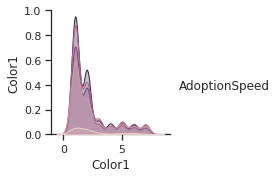

In [201]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="ticks")
plotFrame = mainFrame[['Color1','AdoptionSpeed']];
sns.pairplot(plotFrame, hue="AdoptionSpeed")

In [ ]:
mainFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14988 entries, 0 to 14992
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PetID          14988 non-null  object 
 1   Type           14988 non-null  int64  
 2   Age            14988 non-null  int64  
 3   State          14988 non-null  int64  
 4   StateName      14988 non-null  object 
 5   Breed1         14988 non-null  int64  
 6   BreedName1     14988 non-null  object 
 7   Color1         14988 non-null  int64  
 8   ColorName1     14988 non-null  object 
 9   Color2         14988 non-null  int64  
 10  ColorName2     10518 non-null  object 
 11  Gender         14988 non-null  int64  
 12  MaturitySize   14988 non-null  int64  
 13  FurLength      14988 non-null  int64  
 14  Vaccinated     14988 non-null  int64  
 15  Dewormed       14988 non-null  int64  
 16  Sterilized     14988 non-null  int64  
 17  Health         14988 non-null  int64  
 18  Quanti

In [ ]:

mainFrame=mainFrame.drop(mainFrame.columns[[0,23]], axis = 1, inplace = True)
